In [1]:
import sys
from pathlib import Path

try:
    notebook_path = Path(__file__).resolve()
    project_root = notebook_path.parents[4]
except NameError:
    project_root = Path.cwd().parents[3]

sys.path.insert(0, str(project_root))
print("Project root added to sys.path:", project_root)

# load data
from processor import MultiHopRAG

Project root added to sys.path: c:\Users\USER\BDC800-Capstone


c:\Users\USER\BDC800-Capstone\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Configuration file not found at core/configs/logging.yaml
Using default logging configuration


In [4]:
import os
import pytz
import datetime

os.environ["TZ"] = "UTC"

# Check if UTC timezone is accessible
try:
    print(datetime.datetime.now(pytz.timezone("UTC")))
except Exception as e:
    print("Error accessing UTC timezone:", e)


2025-02-10 18:20:16.299266+00:00


In [7]:
# Load data
import os
os.environ["PYTHONIOENCODING"] = "utf-8"
os.environ["TZ"] = "UTC"

# Then run your original code
multihop_ds = MultiHopRAG()
multihop_ds.load()



In [9]:
# get list of documents
docs = list(multihop_ds.get_documents())
print(docs)

# get list of question answer pairs
qas = list(multihop_ds.get_queries())

[Document(id='5dc53b03e6a879f04b653307e8aaba17', content='Table of Contents Table of Contents Echo, Fire TV, and Kindle deals Apple deals TV deals Laptop deals Headphone and earbud deals Tablet deals Gaming deals Speaker deals Vacuum deals Kitchen deals Smart home deals Fitness deals Beauty tech deals Drone deals Camera deals Lego deals Gift card deals\n\nUPDATE: Nov. 27, 2023, 5:00 a.m. EST This post has been updated with all of the latest Cyber Monday deals available at Amazon.\n\nAmazon is dragging out the year\'s biggest shopping holiday(s) into 11 days of deals.\n\nThe retail giant began its Black Friday sale in the early morning of Friday, Nov. 17 (a week ahead of schedule) and was on top of making the switch to Cyber Monday language in the wee hours of Saturday, Nov. 25. Official Cyber Monday mode, which is currently on through Monday, Nov. 27, includes both a ton of deals carried over from Black Friday plus some new ones.\n\nWe\'re curating a running list of Amazon\'s best Cybe

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


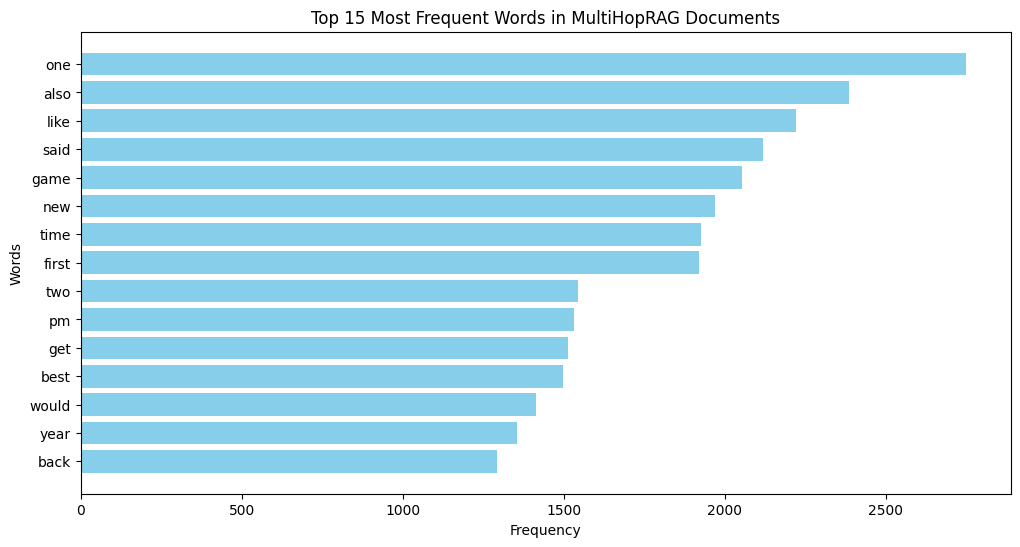

In [14]:
# Re-import necessary libraries since execution state was reset
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


# Extract content from all documents
all_doc_content = " ".join(doc.content for doc in docs)


# Text Preprocessing Function
def preprocess_text(text):
    """Cleans text, removes punctuation, converts to lowercase, tokenizes, and removes stopwords."""
    cleaned_text = text.translate(str.maketrans("", "", string.punctuation)).lower()
    tokens = word_tokenize(cleaned_text)  # Tokenization
    
    stop_words = set(stopwords.words("english"))  # Load NLTK stopwords
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    return Counter(filtered_tokens)  # Return word frequency

# Process document content
doc_word_freq = preprocess_text(all_doc_content)

# Convert to DataFrame for visualization
df_doc_word_freq = pd.DataFrame(doc_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
df_doc_word_freq.head(15)

# Plot the top 15 most frequent words
plt.figure(figsize=(12, 6))
plt.barh(df_doc_word_freq.head(15)['Word'], df_doc_word_freq.head(15)['Frequency'], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 15 Most Frequent Words in MultiHopRAG Documents")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


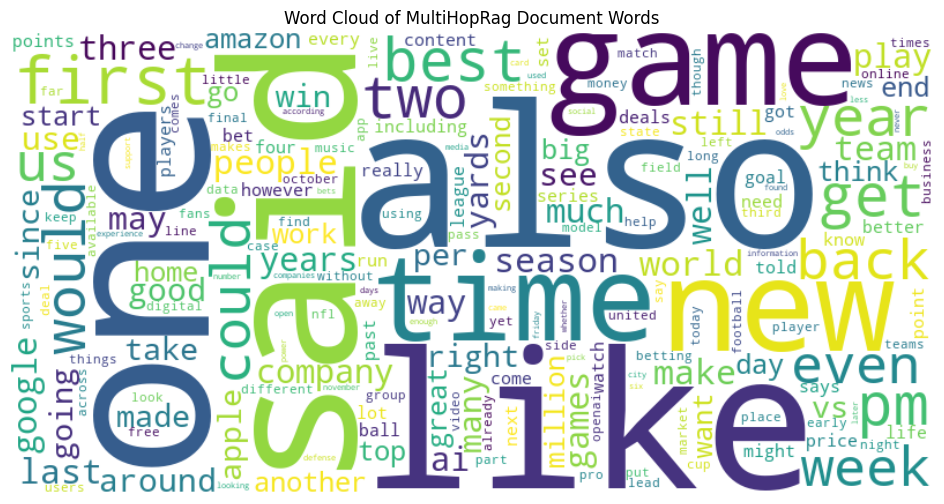

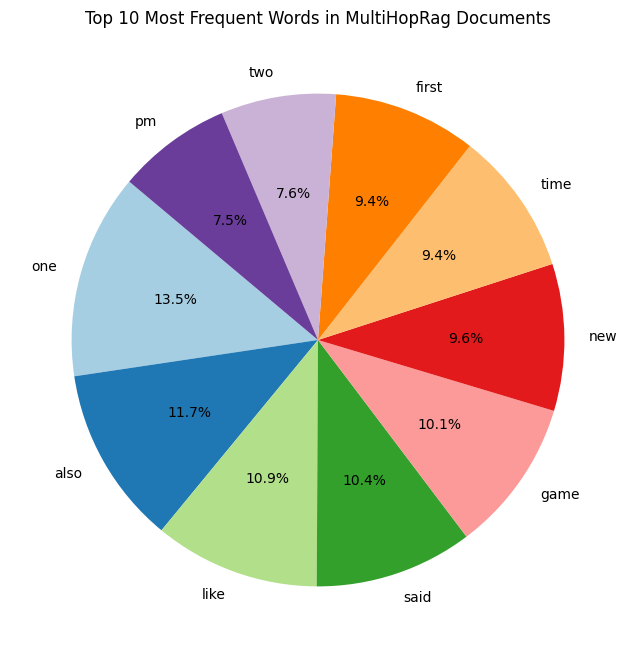

In [15]:
# 1. Word Cloud
from wordcloud import WordCloud

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(doc_word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of MultiHopRag Document Words")
plt.show()

# .2 Pie Chart of the Top 10 Words
top_10_words = df_doc_word_freq.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_10_words['Frequency'], labels=top_10_words['Word'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 10 Most Frequent Words in MultiHopRag Documents")
plt.show()
